In [1]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
Using cached xgboost-2.0.1-py3-none-win_amd64.whl (99.7 MB)


In [3]:
import torch
import numpy as np
import pandas as pd
import os
import sys

In [4]:
import time

In [5]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [6]:
import matplotlib.pyplot as plt 

In [7]:
from torch.utils.data import TensorDataset, DataLoader

In [8]:
import torch.nn as nn
from torch import optim

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
import xgboost as xgb

In [12]:
from xgboost import XGBClassifier

## Load in the data

In [13]:
data = pd.read_csv('../data/gesture-recognition-and-biometrics-electromyogram-grabmyo-1.0.2/features_v2.csv')

In [14]:
data.head()

,session,trial,filename,crest_factor_F1,dasd_F1,diffvar_F1,form_factor_F1,iemg_F1,kurtosis_F1,kurtosis_f_F1,...,rms_W9,skew_W9,skew_f_W9,ssi_W9,sum_f_W9,var_f_W9,wflen_W9,willison_W9,gesture,participant
0,1,1,E:\DS5500-project\data\gesture-recognition-and...,7.091099,0.021834,0.000606,-6502.754507,365.456658,2.574033,85.547962,...,0.022588,-0.148877,5.529415,5.224663,0.109574,2.901826e-10,69.944068,15.0,10,1
1,1,2,E:\DS5500-project\data\gesture-recognition-and...,13.324514,0.023852,0.000689,1352.897349,379.664639,16.942218,329.114870,...,0.016172,-0.205427,9.332349,2.677940,0.077566,2.769772e-10,54.530919,23.0,10,1
2,1,3,E:\DS5500-project\data\gesture-recognition-and...,8.047954,0.016213,0.000326,1295.052394,296.823135,3.795827,134.751765,...,0.017039,-0.204604,9.078430,2.973002,0.064458,1.426359e-10,57.815909,13.0,10,1
3,1,4,E:\DS5500-project\data\gesture-recognition-and...,8.459555,0.026572,0.000864,14453.068135,479.688214,6.938354,98.832790,...,0.031982,-0.266818,5.067522,10.473811,0.131909,4.509337e-10,83.441138,0.0,10,1
4,1,5,E:\DS5500-project\data\gesture-recognition-and...,8.329011,0.026896,0.000901,11827.310277,464.350257,2.379207,116.412205,...,0.031134,-0.092205,5.414199,9.925787,0.177516,9.577100e-10,94.393506,3.0,10,1


In [15]:
data.columns

Index(['session', 'trial', 'filename', 'crest_factor_F1', 'dasd_F1',
       'diffvar_F1', 'form_factor_F1', 'iemg_F1', 'kurtosis_F1',
       'kurtosis_f_F1',
       ...
       'rms_W9', 'skew_W9', 'skew_f_W9', 'ssi_W9', 'sum_f_W9', 'var_f_W9',
       'wflen_W9', 'willison_W9', 'gesture', 'participant'],
      dtype='object', length=761)

In [16]:
feature_cols = [c for c in data.columns if "_" in c]

In [17]:
len(feature_cols)

756

In [18]:
# data.drop(columns=["Unnamed: 0"], inplace=True)

In [19]:
X = data.loc[:, feature_cols].values
Y = (data.loc[:, 'gesture']-1).values

In [20]:
X.shape

(15351, 756)

In [21]:
Y.shape

(15351,)

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=6483)

In [24]:
feature_names = feature_cols

In [25]:
feature_names

['crest_factor_F1',
 'dasd_F1',
 'diffvar_F1',
 'form_factor_F1',
 'iemg_F1',
 'kurtosis_F1',
 'kurtosis_f_F1',
 'mav_F1',
 'max_F1',
 'max_f_F1',
 'mean_F1',
 'mean_f_F1',
 'min_F1',
 'myopulse_F1',
 'p2p_F1',
 'peak_F1',
 'peak_f_F1',
 'power_F1',
 'pulse_indicator_F1',
 'rms_F1',
 'skew_F1',
 'skew_f_F1',
 'ssi_F1',
 'sum_f_F1',
 'var_f_F1',
 'wflen_F1',
 'willison_F1',
 'crest_factor_F10',
 'dasd_F10',
 'diffvar_F10',
 'form_factor_F10',
 'iemg_F10',
 'kurtosis_F10',
 'kurtosis_f_F10',
 'mav_F10',
 'max_F10',
 'max_f_F10',
 'mean_F10',
 'mean_f_F10',
 'min_F10',
 'myopulse_F10',
 'p2p_F10',
 'peak_F10',
 'peak_f_F10',
 'power_F10',
 'pulse_indicator_F10',
 'rms_F10',
 'skew_F10',
 'skew_f_F10',
 'ssi_F10',
 'sum_f_F10',
 'var_f_F10',
 'wflen_F10',
 'willison_F10',
 'crest_factor_F11',
 'dasd_F11',
 'diffvar_F11',
 'form_factor_F11',
 'iemg_F11',
 'kurtosis_F11',
 'kurtosis_f_F11',
 'mav_F11',
 'max_F11',
 'max_f_F11',
 'mean_F11',
 'mean_f_F11',
 'min_F11',
 'myopulse_F11',
 'p2p_F

In [26]:
cls = XGBClassifier(n_jobs = 6)

In [75]:
start = time.time()
cls.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], early_stopping_rounds=10, verbose=True)
print(f"Time taken:  time.time() - start  ")

C:\Users\tanma\anaconda3\envs\cs7150\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.77036	validation_1-mlogloss:1.99526
[1]	validation_0-mlogloss:1.42335	validation_1-mlogloss:1.73543
[2]	validation_0-mlogloss:1.18160	validation_1-mlogloss:1.54774
[3]	validation_0-mlogloss:0.99895	validation_1-mlogloss:1.40479
[4]	validation_0-mlogloss:0.85179	validation_1-mlogloss:1.29279
[5]	validation_0-mlogloss:0.73556	validation_1-mlogloss:1.20301
[6]	validation_0-mlogloss:0.63962	validation_1-mlogloss:1.12426
[7]	validation_0-mlogloss:0.55886	validation_1-mlogloss:1.05800
[8]	validation_0-mlogloss:0.49061	validation_1-mlogloss:0.99987
[9]	validation_0-mlogloss:0.43375	validation_1-mlogloss:0.94934
[10]	validation_0-mlogloss:0.38553	validation_1-mlogloss:0.90370
[11]	validation_0-mlogloss:0.34252	validation_1-mlogloss:0.86487
[12]	validation_0-mlogloss:0.30666	validation_1-mlogloss:0.83070
[13]	validation_0-mlogloss:0.27331	validation_1-mlogloss:0.80207
[14]	validation_0-mlogloss:0.24707	validation_1-mlogloss:0.77698
[15]	validation_0-mlogloss:0.22318	

## Check Result

In [84]:
y_pred = cls.predict(x_test)

report = classification_report(y_test, y_pred, target_names=MotionName)
print(report)

                                    precision    recall  f1-score   support

                Lateral Prehension       0.78      0.76      0.77       176
                   Thumb Adduction       0.77      0.80      0.78       188
Thumb and Little Finger Opposition       0.81      0.85      0.83       182
 Thumb and Index Finger Opposition       0.79      0.77      0.78       195
  Thumb and Index Finger Extension       0.83      0.85      0.84       177
 Thumb and Little Finger Extension       0.92      0.84      0.88       171
 Index and Middle Finger Extension       0.76      0.79      0.78       180
           Little Finger Extension       0.92      0.90      0.91       186
            Index Finger Extension       0.84      0.83      0.83       192
            Thumb Finger Extension       0.89      0.85      0.87       209
                   Wrist Extension       0.97      0.97      0.97       170
                     Wrist Flexion       0.96      0.92      0.94       179
           

In [79]:
MotionName = [ 'Lateral Prehension'  , 'Thumb Adduction'  , 'Thumb and Little Finger Opposition'  ,  
     'Thumb and Index Finger Opposition'  , 'Thumb and Index Finger Extension'  , 'Thumb and Little Finger Extension'  ,  
     'Index and Middle Finger Extension'  , 'Little Finger Extension'  , 'Index Finger Extension'  ,  
     'Thumb Finger Extension'  , 'Wrist Extension'  , 'Wrist Flexion'  ,  
     'Forearm Supination'  , 'Forearm Pronation'  , 'Hand Open'  ,  
     'Hand Close'  ,  'Rest'  ]

In [82]:
len(MotionName)

17

In [47]:
cls.feature_importances_.shape

(756,)

In [48]:
fi_df = pd.DataFrame( "name": feature_names, "values": cls.feature_importances_  )

In [49]:
fi_df

,name,values
0,crest_factor_F1,0.000898
1,dasd_F1,0.002204
2,diffvar_F1,0.003937
3,form_factor_F1,0.000000
4,iemg_F1,0.000542
...,...,...
751,ssi_W9,0.000000
752,sum_f_W9,0.000000
753,var_f_W9,0.000000
754,wflen_W9,0.009058


In [50]:
sorted_f1_df = fi_df.sort_values(by = "values", ascending=False)

Text(0.5, 1.0, 'Feature Imprtance in XGBoost')

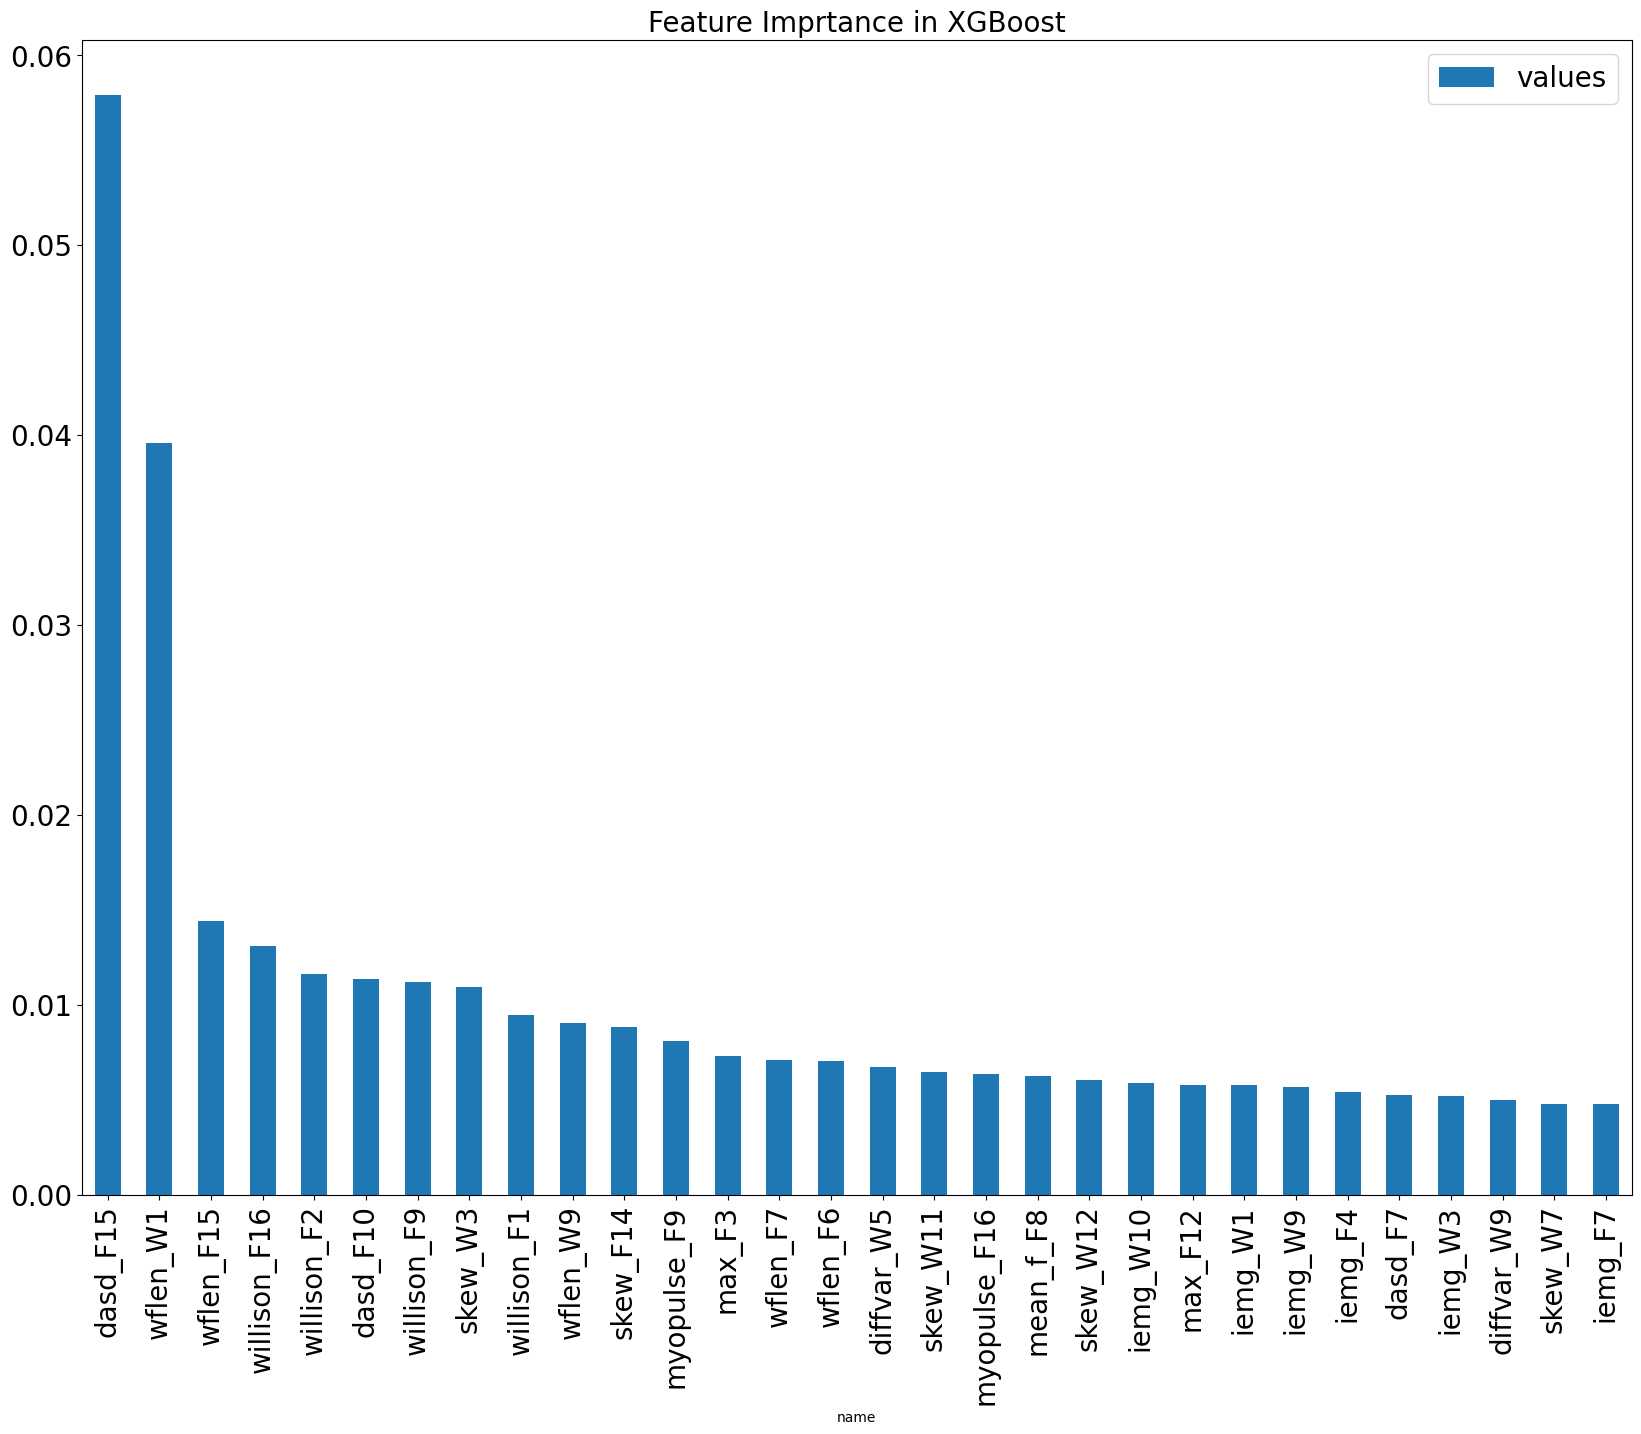

In [51]:

fi_df.sort_values(by = "values", ascending=False)[:30].plot.bar(x = "name", y = "values", figsize = (20,15))
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Feature Imprtance in XGBoost", fontsize=20)

In [52]:
names = list(sorted_f1_df.iloc[:100, :]['name'])

In [53]:
top_features = list(map(lambda x: "_".join(x.split("_")[:-1]), names))
top_electrodes = list(map(lambda x: x.split("_")[-1], names))

In [54]:
from collections import Counter

In [55]:
top_features

['dasd',
 'wflen',
 'wflen',
 'willison',
 'willison',
 'dasd',
 'willison',
 'skew',
 'willison',
 'wflen',
 'skew',
 'myopulse',
 'max',
 'wflen',
 'wflen',
 'diffvar',
 'skew',
 'myopulse',
 'mean_f',
 'skew',
 'iemg',
 'max',
 'iemg',
 'iemg',
 'iemg',
 'dasd',
 'iemg',
 'diffvar',
 'skew',
 'iemg',
 'skew',
 'p2p',
 'dasd',
 'willison',
 'wflen',
 'var_f',
 'p2p',
 'diffvar',
 'max',
 'skew',
 'iemg',
 'diffvar',
 'max',
 'iemg',
 'max',
 'willison',
 'iemg',
 'iemg',
 'max',
 'min',
 'max',
 'peak',
 'myopulse',
 'diffvar',
 'dasd',
 'willison',
 'diffvar',
 'mean_f',
 'willison',
 'willison',
 'min',
 'iemg',
 'dasd',
 'diffvar',
 'wflen',
 'dasd',
 'dasd',
 'diffvar',
 'min',
 'dasd',
 'skew',
 'kurtosis',
 'wflen',
 'dasd',
 'peak',
 'iemg',
 'wflen',
 'skew',
 'max',
 'max',
 'willison',
 'max',
 'wflen',
 'max',
 'p2p',
 'dasd',
 'min',
 'dasd',
 'max_f',
 'dasd',
 'willison',
 'wflen',
 'max',
 'wflen',
 'wflen',
 'willison',
 'wflen',
 'diffvar',
 'max_f',
 'min']

In [56]:
feat_counts = Counter(top_features)

In [57]:
electrodes_counts = Counter(top_electrodes)

In [58]:
sorted_feat_counts = dict(sorted(feat_counts.items(), key=lambda x: x[1], reverse=True))
sorted_electrode_counts = dict(sorted(electrodes_counts.items(), key=lambda x: x[1], reverse=True))

<Figure size 1000x1000 with 0 Axes>

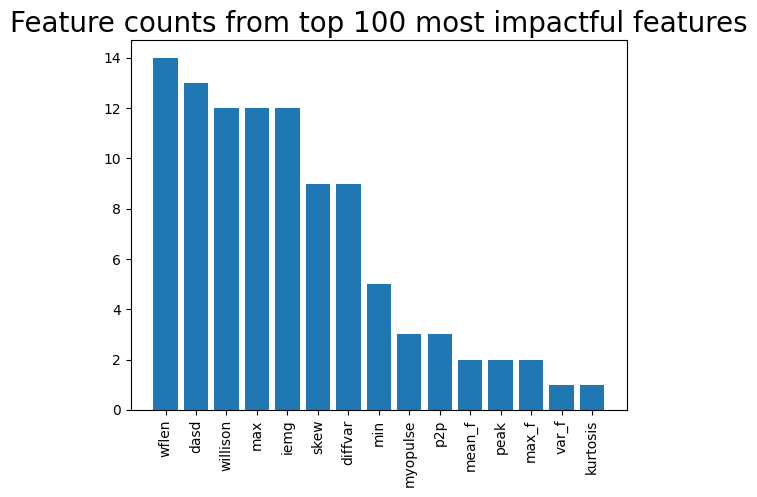

<Figure size 1000x1000 with 0 Axes>

In [64]:
plt.xticks(rotation=90)

plt.title("Feature counts from top 100 most impactful features", fontsize = 20)
plt.bar(x = sorted_feat_counts.keys(), height=sorted_feat_counts.values(), )
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

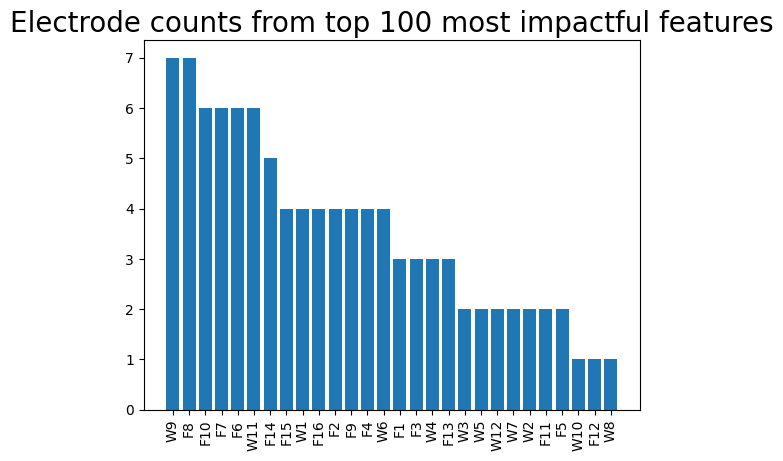

<Figure size 1000x1000 with 0 Axes>

In [65]:
plt.xticks(rotation=90)

plt.title("Electrode counts from top 100 most impactful features", fontsize = 20)
plt.bar(x = sorted_electrode_counts.keys(), height=sorted_electrode_counts.values(), )
plt.figure(figsize=(10,10))

In [60]:
electrodes_counts

Counter({'W9': 7,
         'F8': 7,
         'F10': 6,
         'F7': 6,
         'F6': 6,
         'W11': 6,
         'F14': 5,
         'F15': 4,
         'W1': 4,
         'F16': 4,
         'F2': 4,
         'F9': 4,
         'F4': 4,
         'W6': 4,
         'F1': 3,
         'F3': 3,
         'W4': 3,
         'F13': 3,
         'W3': 2,
         'W5': 2,
         'W12': 2,
         'W7': 2,
         'W2': 2,
         'F11': 2,
         'F5': 2,
         'W10': 1,
         'F12': 1,
         'W8': 1})

In [43]:
!pip install tabulate

In [44]:
sorted_electrode_counts

{'W9': 7,
 'F8': 7,
 'F10': 6,
 'F7': 6,
 'F6': 6,
 'W11': 6,
 'F14': 5,
 'F15': 4,
 'W1': 4,
 'F16': 4,
 'F2': 4,
 'F9': 4,
 'F4': 4,
 'W6': 4,
 'F1': 3,
 'F3': 3,
 'W4': 3,
 'F13': 3,
 'W3': 2,
 'W5': 2,
 'W12': 2,
 'W7': 2,
 'W2': 2,
 'F11': 2,
 'F5': 2,
 'W10': 1,
 'F12': 1,
 'W8': 1}

In [67]:
table_data = [ "electrode": item[0], "count": item[1]   for item in sorted_electrode_counts.items()]

In [70]:
from tabulate import tabulate

In [72]:
print(tabulate(table_data))

---  -
W9   7
F8   7
F10  6
F7   6
F6   6
W11  6
F14  5
F15  4
W1   4
F16  4
F2   4
F9   4
F4   4
W6   4
F1   3
F3   3
W4   3
F13  3
W3   2
W5   2
W12  2
W7   2
W2   2
F11  2
F5   2
W10  1
F12  1
W8   1
---  -


In [66]:
sorted_electrode_counts.items()

dict_items([('W9', 7), ('F8', 7), ('F10', 6), ('F7', 6), ('F6', 6), ('W11', 6), ('F14', 5), ('F15', 4), ('W1', 4), ('F16', 4), ('F2', 4), ('F9', 4), ('F4', 4), ('W6', 4), ('F1', 3), ('F3', 3), ('W4', 3), ('F13', 3), ('W3', 2), ('W5', 2), ('W12', 2), ('W7', 2), ('W2', 2), ('F11', 2), ('F5', 2), ('W10', 1), ('F12', 1), ('W8', 1)])

In [45]:
sorted_feat_counts

{'wflen': 14,
 'dasd': 13,
 'willison': 12,
 'max': 12,
 'iemg': 12,
 'skew': 9,
 'diffvar': 9,
 'min': 5,
 'myopulse': 3,
 'p2p': 3,
 'mean_f': 2,
 'peak': 2,
 'max_f': 2,
 'var_f': 1,
 'kurtosis': 1}